In [28]:
import re
import string
import numpy as np
import pandas as pd

import nltk
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger_eng')

import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/parthharpale/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


In [29]:
# loading our data using pandas read_csv

data = pd.read_csv("preprocessed_kindle_review .csv")
df = data

In [30]:
# printing dim of the data

data.shape

(12000, 4)

In [31]:
# quick review of the dataset

data.head()

,Unnamed: 0,rating,reviewText,summary
0,0,5,This book was the very first bookmobile book I...,50 + years ago...
1,1,1,"When I read the description for this book, I c...",Boring! Boring! Boring!
2,2,5,I just had to edit this review. This book is a...,Wiggleliscious/new toy ready/!!
3,3,5,I don't normally buy 'mystery' novels because ...,Very good read.
4,4,5,"This isn't the kind of book I normally read, a...",Great Story!


In [32]:
# printing the first review from the dataset

data.reviewText[0]

'This book was the very first bookmobile book I bought when I was in the school book club. I loved the story then and I bet a dollar to a donut I will love it again. If my memory serves, I bought this book in 5th grade. That would have been about 1961. I am looking forward to reliving the memories.'

In [33]:
# value_counts() function returns object containing counts of unique values. 
# The resulting object will be in descending order so that the first element is the most frequently-occurring element.

a=data.rating.value_counts()
a

rating
5    3000
4    3000
1    2000
3    2000
2    2000
Name: count, dtype: int64

In [34]:
# checking for null values

data.isnull().sum()

Unnamed: 0    0
rating        0
reviewText    0
summary       2
dtype: int64

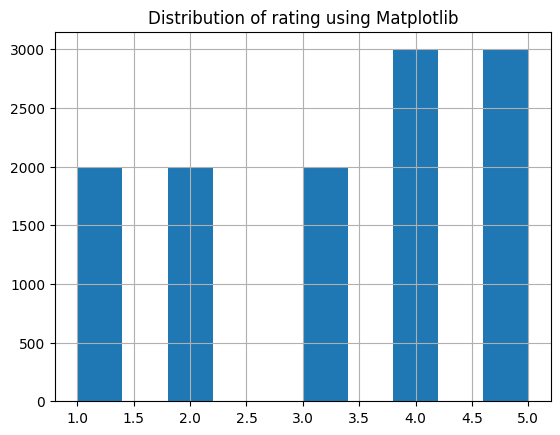

In [35]:
# PLotting Rating histogram

data.rating.hist()
plt.title("Distribution of rating using Matplotlib")
plt.show()

In [36]:
# PLotting Rating using ploty

fig = go.Figure([go.Bar(x=a.index, y=a.values,text=a.values)])
fig.update_layout(title='Distribution of the Rating using ploty')
fig.show()

In [37]:
data.columns

Index(['Unnamed: 0', 'rating', 'reviewText', 'summary'], dtype='object')

In [38]:
data = data.drop(['Unnamed: 0', 'summary'], axis=1)

In [39]:
# preview of the dataset

data.head()

,rating,reviewText
0,5,This book was the very first bookmobile book I...
1,1,"When I read the description for this book, I c..."
2,5,I just had to edit this review. This book is a...
3,5,I don't normally buy 'mystery' novels because ...
4,5,"This isn't the kind of book I normally read, a..."


In [40]:
# if rating is above 3 we will consider it as 1 else 0.

data["rating"] = data["rating"].apply(lambda x: 1 if x < 3  else 0) # positive as 0 and negative as 1
data

,rating,reviewText
0,0,This book was the very first bookmobile book I...
1,1,"When I read the description for this book, I c..."
2,0,I just had to edit this review. This book is a...
3,0,I don't normally buy 'mystery' novels because ...
4,0,"This isn't the kind of book I normally read, a..."
...,...,...
11995,1,Had to read certain passages twice--typos. Wi...
11996,0,Not what i expected. yet a very interesting bo...
11997,0,Dragon Knights is a world where Knights ride d...
11998,0,"Since this story is very short, it's hard to s..."


In [41]:
# lowering the text of the review

data["reviewText"] = data["reviewText"].str.lower()
data.head()

,rating,reviewText
0,0,this book was the very first bookmobile book i...
1,1,"when i read the description for this book, i c..."
2,0,i just had to edit this review. this book is a...
3,0,i don't normally buy 'mystery' novels because ...
4,0,"this isn't the kind of book i normally read, a..."


In [42]:
# removing punctuation

PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

data["reviewText"] = data["reviewText"].apply(lambda text: remove_punctuation(text))
data.head()

,rating,reviewText
0,0,this book was the very first bookmobile book i...
1,1,when i read the description for this book i co...
2,0,i just had to edit this review this book is an...
3,0,i dont normally buy mystery novels because i j...
4,0,this isnt the kind of book i normally read alt...


In [43]:
#removing stop words from the dataset

STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

data["reviewText"] = data["reviewText"].apply(lambda text: remove_stopwords(text))
data.head()

,rating,reviewText
0,0,book first bookmobile book bought school book ...
1,1,read description book couldnt wait read downlo...
2,0,edit review book believe got right updated rew...
3,0,dont normally buy mystery novels dont like how...
4,0,isnt kind book normally read although try limi...


In [44]:
lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

data["reviewText"] = data["reviewText"].apply(lambda text: lemmatize_words(text))
data.head()

,rating,reviewText
0,0,book first bookmobile book buy school book clu...
1,1,read description book couldnt wait read downlo...
2,0,edit review book believe get right update rewr...
3,0,dont normally buy mystery novels dont like how...
4,0,isnt kind book normally read although try limi...


# Visualization on Dataset

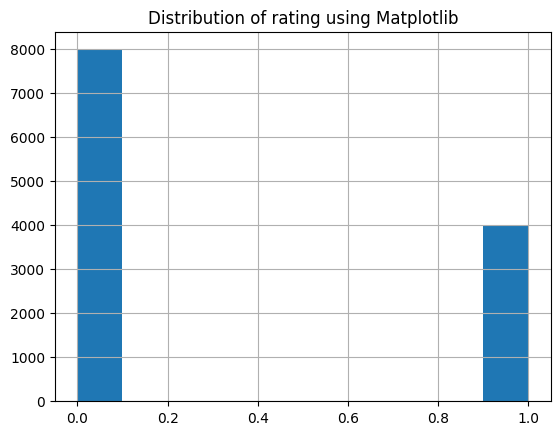

In [45]:
# PLotting Rating histogram

data.rating.hist()
plt.title("Distribution of rating using Matplotlib")
plt.show()

In [46]:
# PLotting Rating using ploty
a  = data.rating.value_counts()
fig = go.Figure([go.Bar(x=a.index, y=a.values,text=a.values)])
fig.update_layout(title='Distribution of the Rating using ploty')
fig.show()

In [52]:
from collections import Counter
cnt = Counter()
for text in data["reviewText"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('book', 15397),
 ('story', 11027),
 ('read', 10023),
 ('like', 6207),
 ('one', 5949),
 ('character', 5676),
 ('get', 5453),
 ('love', 5059),
 ('good', 4763),
 ('would', 4093)]

In [53]:
cnt.get("book")

15397

In [54]:
cn = cnt.most_common(10)
w = []
c = []

In [55]:
for i in cn:
    w.append(i[0])
    c.append(i[1])

In [56]:
fig = px.pie(data, values=c, names=w, color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title="Most Frequent Words")
fig.show()

/Users/parthharpale/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning:

urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020



In [57]:
n_rare_words = 11
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])

In [58]:
RAREWORDS

{'1922',
 'backgroung',
 'don8216t',
 'firedrake',
 'gryphon',
 'helos',
 'insite',
 'meaness',
 'relm',
 'symbols',
 'twicetypos'}

# Train_Test_Split

In [59]:
# preview of data

data

,rating,reviewText
0,0,book first bookmobile book buy school book clu...
1,1,read description book couldnt wait read downlo...
2,0,edit review book believe get right update rewr...
3,0,dont normally buy mystery novels dont like how...
4,0,isnt kind book normally read although try limi...
...,...,...
11995,1,read certain passage twicetypos wish build rel...
11996,0,expect yet interesting book usually don8216t r...
11997,0,dragon knight world knight ride dragon slay wi...
11998,0,since story short hard say much without give a...


In [60]:
train, test = train_test_split(data, test_size = 0.3, stratify = data['rating'], random_state = 42)

In [61]:
cv= CountVectorizer(binary=True, min_df = 10, max_df = 0.95)
cv.fit_transform(train['reviewText'].values)
train_feature_set=cv.transform(train['reviewText'].values)
test_feature_set=cv.transform(test['reviewText'].values)

In [62]:
train_feature_set

<8400x3775 sparse matrix of type '<class 'numpy.int64'>'
	with 323004 stored elements in Compressed Sparse Row format>

In [63]:
train_feature_set.shape[1]

3775

In [64]:
cv.vocabulary_['book']

422

In [65]:
y_train = train['rating'].values
y_test = test['rating'].values

# Building A Model

In [66]:
lr = LogisticRegression(random_state = 42, max_iter=1000)
lr.fit(train_feature_set,y_train)
y_pred = lr.predict(test_feature_set)
print("Accuracy: ",round(metrics.accuracy_score(y_test,y_pred),3))
print("F1: ",round(metrics.f1_score(y_test, y_pred),3))

Accuracy:  0.823
F1:  0.725


In [67]:
cm1 = confusion_matrix(y_test, y_pred)
cm1

array([[2123,  277],
       [ 361,  839]])

In [68]:
cm2 = confusion_matrix(y_test, y_pred,normalize='true')
cm2

array([[0.88458333, 0.11541667],
       [0.30083333, 0.69916667]])

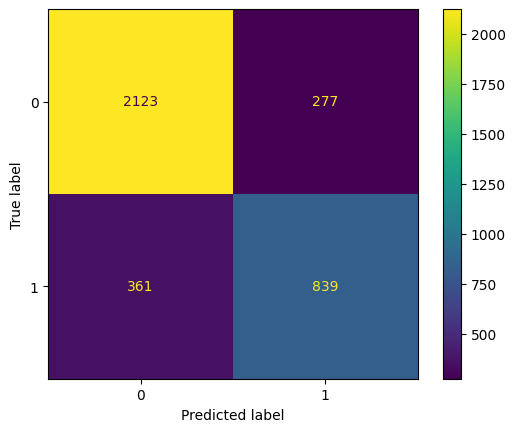

In [69]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=lr.classes_)
disp.plot()
plt.show()

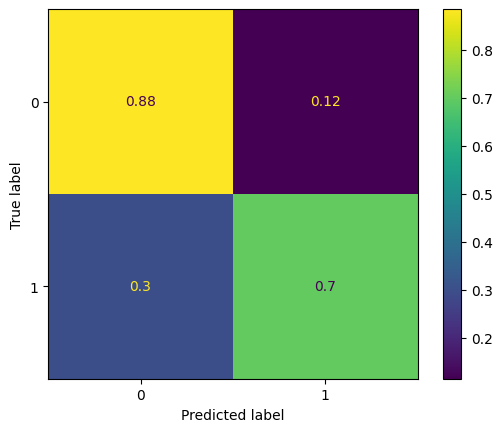

In [70]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=lr.classes_)
disp.plot()
plt.show()

In [71]:
feature_importance = lr.coef_[0][:10]
for i,v in enumerate(feature_importance):
    print('Feature: ', list(cv.vocabulary_.keys())[list(cv.vocabulary_.values()).index(i)], 'Score: ', v)

Feature:  099 Score:  0.18686286160602308
Feature:  10 Score:  0.32319851474437616
Feature:  100 Score:  0.5670498453760044
Feature:  11 Score:  -0.4029140006837039
Feature:  12 Score:  -0.4719650107136765
Feature:  13 Score:  0.8320957889790674
Feature:  14 Score:  -0.6060976179036369
Feature:  15 Score:  0.9141224779636496
Feature:  16 Score:  0.45027415097315543
Feature:  17 Score:  0.435830929621743


In [72]:
feature_importance = lr.coef_[0]
sorted_idx = np.argsort(feature_importance)

In [73]:
top_10_pos_w = [list(cv.vocabulary_.keys())[list(cv.vocabulary_.values()).index(w)] for w in sorted_idx[range(-1,-11, -1)]]
print(top_10_pos_w)

['waste', 'delete', 'cardboard', 'sorry', 'depress', 'boring', 'thin', '25', 'ugh', 'weird']


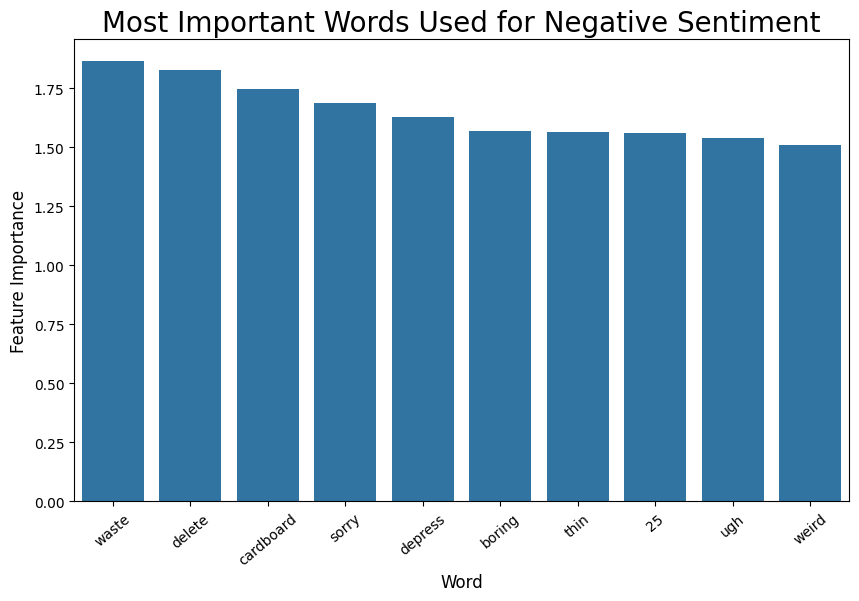

In [74]:
fig = plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_10_pos_w, y=feature_importance[sorted_idx[range(-1,-11, -1)]])
plt.title("Most Important Words Used for Negative Sentiment",fontsize = 20)
x_locs,x_labels = plt.xticks()
plt.setp(x_labels, rotation = 40)
plt.ylabel('Feature Importance', fontsize = 12)
plt.xlabel('Word', fontsize = 12);

In [75]:
top_10_neg_w = [list(cv.vocabulary_.keys())[list(cv.vocabulary_.values()).index(w)] for w in sorted_idx[:10]]
print(top_10_neg_w)

['enjoyed', 'verne', 'enjoyable', 'shot', 'fun', 'hunter', 'thumb', 'thrill', 'loved', 'hot']


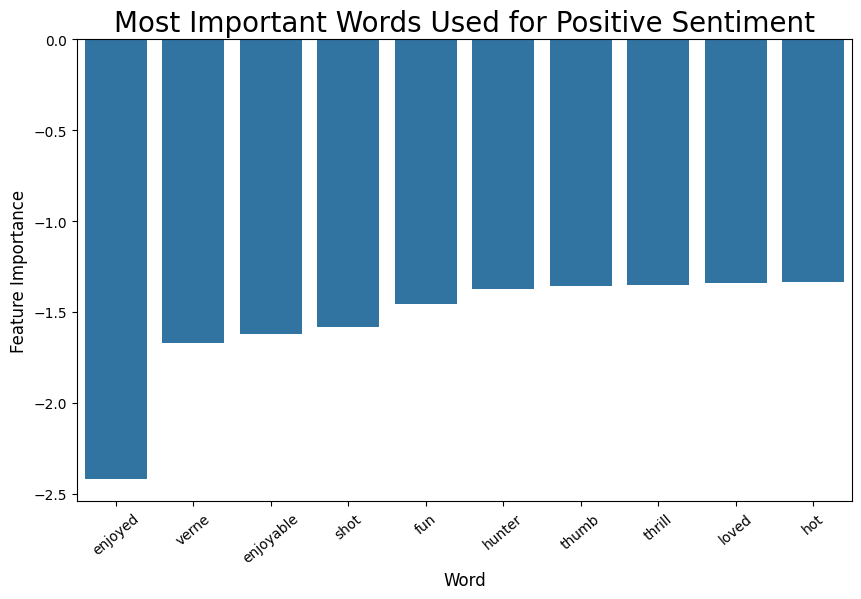

In [76]:
fig = plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_10_neg_w, y=feature_importance[sorted_idx[:10]])
plt.title("Most Important Words Used for Positive Sentiment",fontsize = 20)
x_locs,x_labels = plt.xticks()
plt.setp(x_labels, rotation = 40)
plt.ylabel('Feature Importance', fontsize = 12)
plt.xlabel('Word', fontsize = 12);

# Prediction on our sentences

In [77]:
lr.classes_#negative class first, positive class next

array([0, 1])

In [78]:
test_review = cv.transform(["I did not enjoy the book"])
p = lr.predict_proba(test_review)
s = lr.predict(test_review)
print("prob are:",p)
print("prediction are:",s)

prob are: [[0.78797869 0.21202131]]
prediction are: [0]


In [79]:
pred_proba_df = pd.DataFrame(lr.predict_proba(test_feature_set))
threshold_list = [0.3,0.4,0.45,0.5]
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    test_f1 = round(metrics.f1_score(y_test, Y_test_pred.loc[:,1].values),3)
    print('F1: {}'.format(test_f1))


******** For i = 0.3 ******
F1: 0.737

******** For i = 0.4 ******
F1: 0.731

******** For i = 0.45 ******
F1: 0.733

******** For i = 0.5 ******
F1: 0.725


/var/folders/l6/z6511d956hv237h12mbrv4d40000gn/T/ipykernel_2175/1563315806.py:5: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

/var/folders/l6/z6511d956hv237h12mbrv4d40000gn/T/ipykernel_2175/1563315806.py:5: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

/var/folders/l6/z6511d956hv237h12mbrv4d40000gn/T/ipykernel_2175/1563315806.py:5: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

/var/folders/l6/z6511d956hv237h12mbrv4d40000gn/T/ipykernel_2175/1563315806.py:5: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

